<a href="https://colab.research.google.com/github/PrakulSmarty/EDA_Theory_03/blob/main/Module6_21BDS0003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load Dataset

In [17]:
data = pd.read_csv('/content/Employee Attrition.csv')

# Select numeric columns for PCA

In [18]:
data_numeric = data.select_dtypes(include=['float64', 'int64'])

# Standardize the features

In [19]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Perform PCA

In [20]:
pca_data = PCA()
attrition_pca_components = pca_data.fit_transform(data_scaled)

# PCA Results: Eigenvalues and Loadings

In [21]:
print("Explained Variance (Eigenvalues):", pca_data.explained_variance_ratio_)
print("Component Loadings:")
print(pd.DataFrame(pca_data.components_, columns=data_numeric.columns))

Explained Variance (Eigenvalues): [1.93997382e-01 7.65090980e-02 7.31508867e-02 5.04710018e-02
 4.75020019e-02 4.50546237e-02 4.40352053e-02 4.34784188e-02
 4.26491343e-02 4.12875837e-02 4.04609045e-02 3.96056679e-02
 3.77635640e-02 3.76473725e-02 3.70092773e-02 3.61719648e-02
 3.13958988e-02 2.25570386e-02 2.17552103e-02 1.16612768e-02
 9.41908664e-03 8.49512361e-03 5.90594818e-03 2.01633043e-03
 1.41952491e-17 0.00000000e+00]
Component Loadings:
         Age     DailyRate  DistanceFromHome     Education  EmployeeCount  \
0   0.277013 -4.260774e-03      4.073127e-03  7.782232e-02  -0.000000e+00   
1  -0.282735 -3.532727e-02      5.625442e-02 -1.470903e-01   1.110223e-16   
2   0.255244  6.018479e-02      3.150556e-02  1.008549e-01   5.551115e-17   
3   0.044930  5.933307e-02      2.673768e-01  3.149526e-01   3.885781e-16   
4  -0.016562 -4.849345e-01      4.627101e-02  1.961211e-02   1.970646e-15   
5   0.009313  3.135230e-01      1.017522e-01 -7.635638e-02  -5.204170e-16   
6   0.008

# Scree Plot

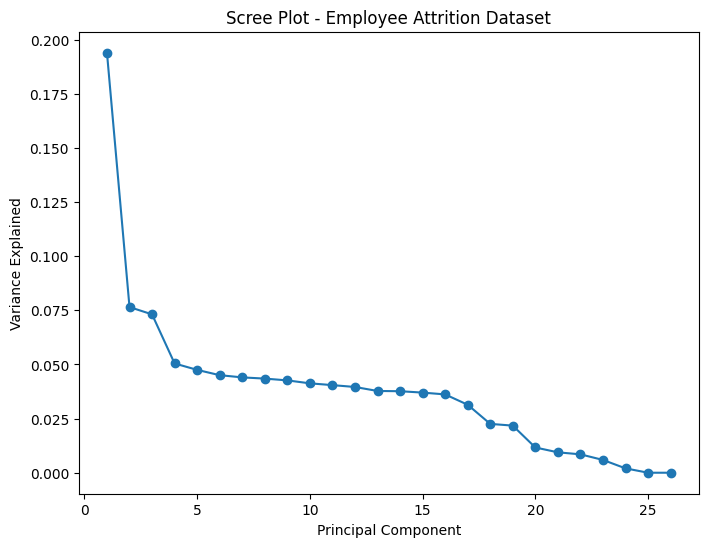

In [22]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca_data.explained_variance_ratio_) + 1), pca_data.explained_variance_ratio_, marker='o')
plt.title('Scree Plot - Employee Attrition Dataset')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

n_comp = 3
pca_data_selected = PCA(n_components=n_comp)
attrition_pca_selected_components = pca_data_selected.fit_transform(data_scaled)

# Biplot

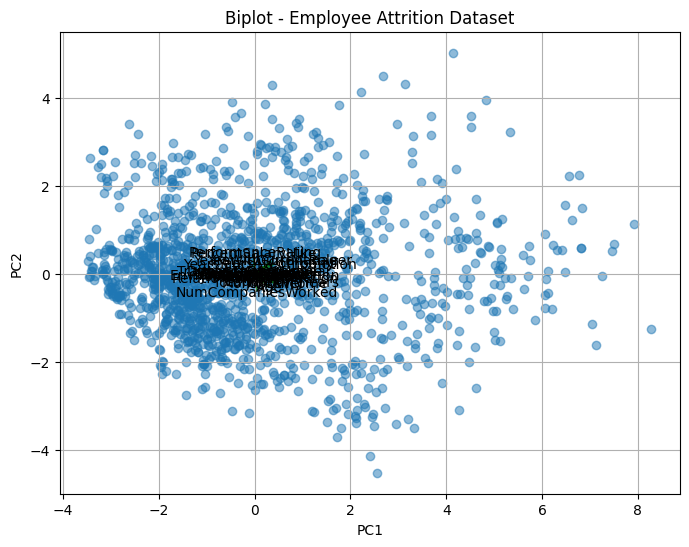

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(attrition_pca_selected_components[:, 0], attrition_pca_selected_components[:, 1], alpha=0.5)
for i, feature in enumerate(data_numeric.columns):
    plt.arrow(0, 0, pca_data_selected.components_[0, i], pca_data_selected.components_[1, i], color='g', alpha=0.7)
    plt.text(pca_data_selected.components_[0, i]*1.1, pca_data_selected.components_[1, i]*1.1, feature, color='black', ha='center', va='center')
plt.title('Biplot - Employee Attrition Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

# PCA Summary

In [27]:
pca_summary = pd.DataFrame(attrition_pca_selected_components, columns=[f"PC{i+1}" for i in range(n_comp)]).describe()
print("PCA Summary - 21BDS0003:")
print(pca_summary)

PCA Summary - 21BDS0003:
                PC1           PC2           PC3
count  1.470000e+03  1.470000e+03  1.470000e+03
mean  -4.833624e-17  9.667248e-18 -4.833624e-18
std    2.158496e+00  1.355532e+00  1.325450e+00
min   -3.484688e+00 -4.511921e+00 -2.916613e+00
25%   -1.574095e+00 -8.546734e-01 -9.871301e-01
50%   -4.593733e-01 -3.008893e-02 -2.659334e-01
75%    1.125397e+00  7.329282e-01  8.033499e-01
max    8.284849e+00  5.020988e+00  5.229802e+00
